montar o df\
-ano gerado (fácil)\
-ano retirando os dias com dados faltantes (fácil mas n muito bom)\
-ano retirando dias com dados faltantes em horarios significativos (difícil mas bom)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
pd.set_option('display.max_rows', 1000)

In [3]:
df=pd.DataFrame([])

nome_meses=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']

for y in range (4,10):  # 4 de 201'4' e 10 significa que vai até o 9 de 201'9'
    for m in nome_meses:
        c=pd.read_excel(r'C:\Users\Katia Suely\Desktop\Planilhas do programa\201{}\201{}{}.xlsx'.format(y,y,m))
        df=df.append(c)
df.set_index('Unnamed: 0',inplace=True)
B=pd.date_range(start='2014-01-01 00:00:00', end='2019-12-31 23:50:00', freq='10min')
df.index=B ## Para utilizar o index em outro conjunto de dados que criarmos

### Ano gerado
-esse ano teve problemas: os dados se concentraram em um período do ano, pois os dias em que houve chuva foram aproximados dos mesmos dias em outros anos que não houve chuva

In [4]:
a=df.loc[(df.index.strftime('%y')=='16')]
a=a.drop(a.loc[a.index.strftime('%m:%d')=='02:29'].index)

df1=pd.DataFrame([])

df1['2014']=df.loc[df.index.strftime('%y')=='14'].SolarRad.values
df1['2015']=df.loc[df.index.strftime('%y')=='15'].SolarRad.values
df1['2016']=a.SolarRad.values
df1['2017']=df.loc[df.index.strftime('%y')=='17'].SolarRad.values
df1['2018']=df.loc[df.index.strftime('%y')=='18'].SolarRad.values
df1['2019']=df.loc[df.index.strftime('%y')=='19'].SolarRad.values

df1['MeanSolarRad']=df1.mean(axis=1)

C=pd.date_range(start='2050-01-01 00:00:00', end='2050-12-31 23:50:00', freq='10min')
C=C.strftime('%b-%d %H:%M')
df1.index = C

Mean=df1.MeanSolarRad
Mean.index=pd.date_range(start='2014-01-01 00:00:00', end='2014-12-31 23:50:00', freq='10min')

H=(Mean.groupby(Mean.index.strftime('%m-%d')).sum()/6).values             #agora os dados estarão em Wh/m2d
H=pd.DataFrame(H)

b=df.loc[(df.index.strftime('%y')=='16')]
b=a.drop(a.loc[a.index.strftime('%m:%d')=='02:29'].index)

df2=pd.DataFrame([])

df2['2014']=df.loc[df.index.strftime('%y')=='14'].TempOut.values/1000
df2['2015']=df.loc[df.index.strftime('%y')=='15'].TempOut.values/1000
df2['2016']=a.TempOut.values/1000
df2['2017']=df.loc[df.index.strftime('%y')=='17'].TempOut.values/1000
df2['2018']=df.loc[df.index.strftime('%y')=='18'].TempOut.values/1000
df2['2019']=df.loc[df.index.strftime('%y')=='19'].TempOut.values/1000

df2.index = pd.date_range(start='2014-01-01 00:00:00', end='2014-12-31 23:50:00', freq='10min')

df2['2018'].loc[df2['2018']>40]=np.nan
df2['2019'].loc[df2['2019']>40]=np.nan

filt=df2.index.strftime('%Y-%m-%d')
dT=(df2.groupby(filt).max()).mean(axis=1)-(df2.groupby(filt).min()).mean(axis=1)

display(df1)
display(H)
display(dT)

,2014,2015,2016,2017,2018,2019,MeanSolarRad
Jan-01 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jan-01 00:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jan-01 00:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jan-01 00:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jan-01 00:40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
Dec-31 23:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dec-31 23:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dec-31 23:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dec-31 23:40,0.0,0.0,0.0,0.0,0.0,NaN,0.0


,0
0,6899.038889
1,6185.977778
2,6987.886111
3,6290.352778
4,6217.755556
5,6329.972222
6,5743.366667
7,6107.266667
8,5979.916667
9,5426.738889


2014-01-01    4.283333
2014-01-02    4.900000
2014-01-03    5.000000
2014-01-04    5.100000
2014-01-05    4.433333
2014-01-06    5.266667
2014-01-07    4.816667
2014-01-08    5.116667
2014-01-09    4.850000
2014-01-10    4.866667
2014-01-11    5.600000
2014-01-12    5.550000
2014-01-13    5.216667
2014-01-14    4.933333
2014-01-15    5.600000
2014-01-16    5.033333
2014-01-17    5.483333
2014-01-18    5.416667
2014-01-19    5.400000
2014-01-20    5.266667
2014-01-21    4.533333
2014-01-22    4.933333
2014-01-23    5.416667
2014-01-24    4.483333
2014-01-25    4.950000
2014-01-26    5.266667
2014-01-27    5.150000
2014-01-28    5.366667
2014-01-29    5.650000
2014-01-30    5.066667
2014-01-31    5.683333
2014-02-01    4.566667
2014-02-02    5.116667
2014-02-03    5.183333
2014-02-04    5.383333
2014-02-05    5.033333
2014-02-06    5.383333
2014-02-07    5.400000
2014-02-08    5.400000
2014-02-09    6.333333
2014-02-10    5.600000
2014-02-11    6.000000
2014-02-12    6.266667
2014-02-13 

### Ano retirando dias com dados faltantes em horarios significativos (difícil mas bom)

dt_inteiro
dt_diurno

In [5]:
filt1=(df.index.strftime('%H:%M')>='04:40')&(df.index.strftime('%H:%M')<='17:40')
filt2=(df.index.strftime('%H:%M')>='07:00')&(df.index.strftime('%H:%M')<='16:20')

dfd=df.loc[filt1]
df_p_analise=df.loc[filt2] 

#primeiro filtro a gente vai eliminar dias com 6 ou mais dados faltantes no periodo do filt2

# o restante vamos fazer uma análise para estimar o quanto se perde e chegar em 5%

primeiro_filtro=pd.DataFrame(df_p_analise.loc[df_p_analise.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts().sort_index(),columns=['valores'])
primeiro_filtro=primeiro_filtro.loc[primeiro_filtro.valores>5].index
primeiro_filtro

dfd=dfd.drop(dfd.loc[dfd.index.strftime('%y-%m-%d').isin(primeiro_filtro)].index)

#decidimos não aplicar um segundo filtro, pois mesmo nos dias em que havia muitos dados faltantes, depois do primeiro filtro,
#ainda se via utilidade e, pelo q observamos, a soma dos dados perdidos não chegariam perto de 5% do total 

In [5]:
#dfd.loc[dfd.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts()

In [6]:
#filt3=(dfd.loc[dfd.index.strftime('%y-%m-%d').isin(dfd.loc[dfd.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts().index)].index.strftime('%H:%M')>='09:00')&(dfd.loc[dfd.index.strftime('%y-%m-%d').isin(dfd.loc[dfd.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts().index)].index.strftime('%H:%M')<='14:40')
#dfd.loc[dfd.index.strftime('%y-%m-%d').isin(dfd.loc[dfd.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts().index)].loc[filt3].loc[dfd.loc[dfd.index.strftime('%y-%m-%d').isin(dfd.loc[dfd.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts().index)].loc[filt3].FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts()

In [6]:
H=dfd.SolarRad.groupby(dfd.index.strftime('%y-%m-%d')).sum()/6

def f2c(x):
    r=x
    if r>40:
        r = (r-32)*5/9
    else: r=r
    return r

dfd.TempOut=dfd.TempOut/1000
dfd.TempOut=(dfd.TempOut).map(f2c)

Max=pd.DataFrame(dfd.TempOut.groupby(dfd.index.strftime('%y-%m-%d')).max())

Min=pd.DataFrame(dfd.TempOut.groupby(dfd.index.strftime('%y-%m-%d')).min())

dT=Max-Min

\

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Radiação ET:



\\

continuar:
    -pegar outro arquivo python para calcular a radiação et com aquelas equações,criar planilha e ler aqui, pra n precisar poluir
    essa célula
    -comparar radETSite com radETCalc
    -decidir qual usar; Se ambas estiverem muito proximas, optar pela que a gente calculou

In [8]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [9]:
radETSite=pd.read_excel(r'C:\Users\Alexandro\Desktop\Matérias\Projeto\RadETpegueinosite.xlsx')  #para um ano
radETSite.index=pd.date_range(start='2050-01-01 00:00:00', end='2050-12-31 23:50:00', freq='1h')
radETSite.drop(['Date','Time'],inplace=True,axis=1)
radETSite=radETSite.groupby(radETSite.index.strftime('%m-%d')).sum()

radETCalc=pd.read_excel(r'C:\Users\Alexandro\Desktop\Matérias\Projeto\radETCalc.xlsx')
radETCalc.index=pd.date_range(start='2050-01-01 00:00:00', end='2050-12-31 23:50:00', freq='1d')
radETCalc=radETCalc.groupby(radETCalc.index.strftime('%m-%d')).sum()
radETCalc.drop(['Unnamed: 0'],inplace=True,axis=1)

display(radETSite)
display(radETCalc)
plt.plot(radETCalc)
plt.plot(radETSite)
plt.xlabel('Conclusão: usar o do site')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Alexandro\\Desktop\\Matérias\\Projeto\\RadETpegueinosite.xlsx'

In [7]:
radETSite6=pd.read_excel(r'C:\Users\Katia Suely\Desktop\Planilhas do programa\radet2014-2019(10min).xlsx')
radETSite6.index=pd.date_range(start='2014-01-01 00:00:00', end='2019-12-31 23:50:00', freq='10min')
radETSite6.drop(['Date','Time'],inplace=True,axis=1)
radETSite6=radETSite6.groupby(radETSite6.index.strftime('%y-%m-%d')).sum()/6
radETSite6

,ETR global
14-01-01,10594.542650
14-01-02,10598.694750
14-01-03,10603.005783
14-01-04,10607.471633
14-01-05,10612.081067
...,...
19-12-27,10575.996367
19-12-28,10578.702550
19-12-29,10581.839733
19-12-30,10585.334050


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

fazer df no formato:\
-H,Ho,KT,dT

In [ ]:
#pro ano gerado

#H.index=Ho.index
#dT.index=Ho.index
#dff=pd.DataFrame(H)
#dff['Ho']=Ho
#dff['dT']=dT
#dff.columns=['H','Ho','dT']
#dff['KT']=dff['H']/dff['Ho']
#dff' ' '

In [8]:
#pros anos com filtro
dff=pd.DataFrame(H)
dff['Ho']=radETSite6
dff['dT']=dT
dff.columns=['H','Ho','dT']
dff['KT']=dff['H']/dff['Ho']
dff

,H,Ho,dT,KT
14-01-01,7339.333333,10594.542650,4.3,0.692747
14-01-02,6873.166667,10598.694750,4.2,0.648492
14-01-03,7160.333333,10603.005783,4.7,0.675312
14-01-04,5233.166667,10607.471633,6.0,0.493347
14-01-05,5031.166667,10612.081067,6.0,0.474098
...,...,...,...,...
19-12-27,6919.833333,10575.996367,4.3,0.654296
19-12-28,7264.833333,10578.702550,4.4,0.686741
19-12-29,6979.166667,10581.839733,4.3,0.659542
19-12-30,5832.833333,10585.334050,4.4,0.551030


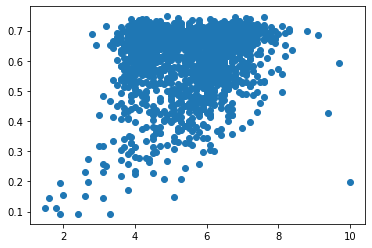

In [12]:
plt.scatter(dff.dT,dff.KT)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Análise\
-r_2 do kt\
-r_2 do h e h predito\
-erros (RMSE, MAE, etc...)

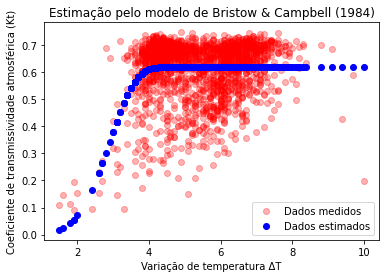

In [9]:
Alt = 38

def KTBC(x,A,B,C):
    return A*(1-np.exp(-B*x**C))

def KTHarg(x,A,B):
    return A*(x)**(0.5) + B

def KTChen(x,A,B):
    return A*np.log(x) + B

def KTAnand(x,A):
    return A*(1+2.7*10**(-5)*Alt)*x**(0.5)



gBC = [1,0,0]
gH = [1,1]
gChen = [1,1]
gAnand = [1]

n = len(dff.KT)
yBC = np.empty(n)
yH = np.empty(n)
yChen = np.empty(n)
yAnand = np.empty(n)

from scipy.optimize import curve_fit

cBC, covBC = curve_fit(KTBC,dff.dT,dff.KT,gBC)
cH, covH = curve_fit(KTHarg,dff.dT,dff.KT,gH)
cChen, covChen = curve_fit(KTChen,dff.dT,dff.KT,gChen)
cAnand, covAnand = curve_fit(KTAnand,dff.dT,dff.KT,gAnand)

for i in range (n):
    yBC[i] = KTBC(dff.dT[i],cBC[0],cBC[1],cBC[2])
    yH[i] = KTHarg(dff.dT[i],cH[0],cH[1])
    yChen[i] = KTChen(dff.dT[i],cH[0],cChen[1])
    yAnand[i] = KTAnand(dff.dT[i],cAnand[0])

plt.scatter(dff.dT,dff.KT,color='r',alpha=0.3,label='Dados medidos')
plt.scatter(dff.dT,yBC,color='b',label='Dados estimados')
plt.xlabel("Variação de temperatura ΔT")
plt.ylabel("Coeficiente de transmissividade atmosférica (Kt)")
plt.title('Estimação pelo modelo de Bristow & Campbell (1984)') 
plt.legend()
plt.show()
#plt.scatter(dff.dT,yH,color='g')
#plt.scatter(dff.dT,yChen,color='y')
#plt.scatter(dff.dT,yAnand,color='grey')

plt.show()


In [14]:
yBC[0]

0.6189079266557231

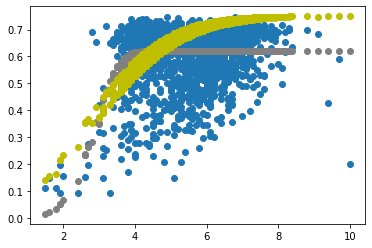

In [10]:
def KTWeiss(x,B):
    return 0.75*(1-np.exp(-B*x**2/(dff.Ho.loc[x.index]*3600/10**6)))

def KTGoodin(x,A,B,C):
    return A - A*np.exp(-B*x**C/(dff.Ho.loc[x.index]*3600/10**6))

gGoodin = [0.75,0,2]
gWeiss = [1.5]

yGoodin = np.empty(n)
yWeiss = np.empty(n)

cGoodin, covGoodin = curve_fit(KTGoodin,dff.dT,dff.KT)
cWeiss, covWeiss = curve_fit(KTWeiss,dff.dT,dff.KT)

yGoodin = KTGoodin(dff.dT,cGoodin[0],cGoodin[1],cGoodin[2])
yWeiss = KTWeiss(dff.dT,cWeiss[0])

    
plt.scatter(dff.dT,dff.KT)
plt.scatter(dff.dT,yGoodin,color='grey')
plt.scatter(dff.dT,yWeiss,color='y')


### r2

In [11]:
from sklearn.metrics import r2_score
print('R^2: ', r2_score(dff.H,yBC*dff.Ho))
print('R^2: ', r2_score(dff.H,yH*dff.Ho))

R^2:  0.3032150535913405
R^2:  0.21305222065880347


In [12]:
correlation_matrix = np.corrcoef(dff.H,yH*dff.Ho)
correlation_xy = correlation_matrix[0,1]
r2H = correlation_xy**2

correlation_matrix = np.corrcoef(dff.H,yBC*dff.Ho)
correlation_xy = correlation_matrix[0,1]
r2BC = correlation_xy**2

correlation_matrix = np.corrcoef(dff.H,yChen*dff.Ho)
correlation_xy = correlation_matrix[0,1]
r2Chen = correlation_xy**2

correlation_matrix = np.corrcoef(dff.H,yGoodin*dff.Ho)
correlation_xy = correlation_matrix[0,1]
r2Goodin = correlation_xy**2

correlation_matrix = np.corrcoef(dff.H,yWeiss*dff.Ho)
correlation_xy = correlation_matrix[0,1]
r2Weiss = correlation_xy**2

correlation_matrix = np.corrcoef(dff.H,yAnand*dff.Ho)
correlation_xy = correlation_matrix[0,1]
r2Anand = correlation_xy**2


print(r2BC)
print(r2H)
print(r2Chen)
print(r2Goodin)
print(r2Weiss)
print(r2Anand)

0.30368088055212195
0.22569331096143183
0.23053978066783548
0.30606369141940915
0.06150820536694167
0.08338095670154125


### MAE

In [13]:
from sklearn.metrics import mean_absolute_error

MAE_BC=mean_absolute_error((dff.H),(yBC*dff.Ho), multioutput='raw_values')*3600/10**6

MAE_Harg=mean_absolute_error((dff.H),(yH*dff.Ho), multioutput='raw_values')*3600/10**6

MAE_Chen=mean_absolute_error((dff.H),(yChen*dff.Ho), multioutput='raw_values')*3600/10**6

MAE_Goodin=mean_absolute_error((dff.H),(yGoodin*dff.Ho), multioutput='raw_values')*3600/10**6

MAE_Weiss=mean_absolute_error((dff.H),(yWeiss*dff.Ho), multioutput='raw_values')*3600/10**6

MAE_Anand=mean_absolute_error((dff.H),(yAnand*dff.Ho), multioutput='raw_values')*3600/10**6

print(MAE_BC)
print(MAE_Harg)
print(MAE_Chen)
print(MAE_Goodin)
print(MAE_Weiss)
print(MAE_Anand)


[2.72477811]
[2.89535177]
[3.27846019]
[2.71819588]
[3.68187746]
[3.41004072]


### RMSE

In [14]:
from sklearn.metrics import mean_squared_error

RMSE_Harg = mean_squared_error((dff.H),(yH*dff.Ho), squared=False)*3600/10**6

RMSE_BC = mean_squared_error((dff.H),(yBC*dff.Ho), squared=False)*3600/10**6

RMSE_Chen = mean_squared_error((dff.H),(yChen*dff.Ho), squared=False)*3600/10**6

RMSE_Weiss = mean_squared_error((dff.H),(yWeiss*dff.Ho), squared=False)*3600/10**6

RMSE_Goodin = mean_squared_error((dff.H),(yGoodin*dff.Ho), squared=False)*3600/10**6

RMSE_Anand = mean_squared_error((dff.H),(yAnand*dff.Ho), squared=False)*3600/10**6

print(RMSE_BC)
print(RMSE_Harg)
print(RMSE_Chen)
print(RMSE_Goodin)
print(RMSE_Weiss)
print(RMSE_Anand)

3.5678095519884585
3.7916238051575437
3.9354475871937638
3.5619167283466027
4.654978170982553
4.252413600780455


In [15]:
tabela_erros=pd.DataFrame([],index=['BC','Harg','Chen','Goodin','Weiss','Anand'],columns=['r2','MAE','RMSE'])
tabela_erros['r2']=[r2BC,r2H,r2Chen,r2Goodin,r2Weiss,r2Anand]
tabela_erros['MAE']=[float(MAE_BC),float(MAE_Harg),float(MAE_Chen),float(MAE_Goodin),float(MAE_Weiss),float(MAE_Anand)]
tabela_erros['RMSE']=[RMSE_BC,RMSE_Harg,RMSE_Chen,RMSE_Goodin,RMSE_Weiss,RMSE_Anand]

In [16]:
tabela_erros.drop(['Weiss'],inplace=True)

### continuar daqui
-tabela dos erros

In [17]:
tabela_de_coefs = pd.DataFrame([],columns=['BC','Harg','Chen','Goodin','Anand'],index=['a','b','c'])
tabela_de_coefs['BC']=cBC
tabela_de_coefs.iloc[0:2,1]=cH
tabela_de_coefs.iloc[0:2,2]=cChen
tabela_de_coefs['Goodin']=cGoodin
tabela_de_coefs.iloc[0,4]=cAnand




In [18]:
tabela_de_coefs=tabela_de_coefs.replace(np.nan,'-').T

In [19]:
tabela_de_coefs

,a,b,c
BC,0.620653,0.0035999,5.07153
Harg,0.0615836,0.471578,-
Chen,0.0786622,0.483123,-
Goodin,0.620743,0.0858861,5.38974
Anand,0.263798,-,-


In [20]:
sns.set_palette('rocket')

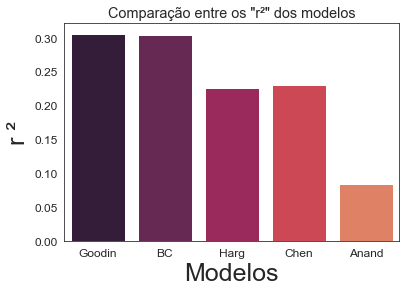

In [21]:
tabela_erros = tabela_erros.reindex(['Goodin','BC','Harg','Chen','Anand'])
sns.set_context(font_scale=2,rc={"font.size":12,"axes.labelsize":25})
sns.set_style("white")
plot= sns.barplot(x=tabela_erros.index,y='r2',data=tabela_erros)
plt.xlabel("Modelos")
plt.ylabel("r ²")
plt.title('Comparação entre os "r²" dos modelos') 
plt.show(plot)


In [76]:
sns.set_palette('Paired')

In [79]:
sns.color_palette("tab10")


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

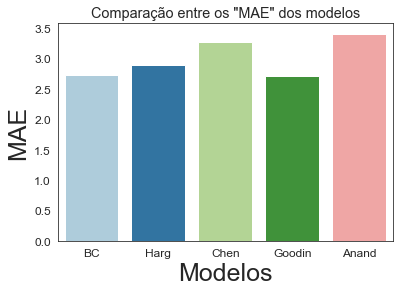

In [77]:
tabela_erros = tabela_erros.reindex(['Goodin','BC','Harg','Chen','Anand'])
sns.set_context(font_scale=2,rc={"font.size":12,"axes.labelsize":25})
sns.set_style("white")
plot= sns.barplot(x=tabela_erros.index,y='MAE',data=tabela_erros)
plt.xlabel("Modelos")
plt.ylabel("MAE")
plt.title('Comparação entre os "MAE" dos modelos') 
plt.show(plot)

NameError: name 'font' is not defined

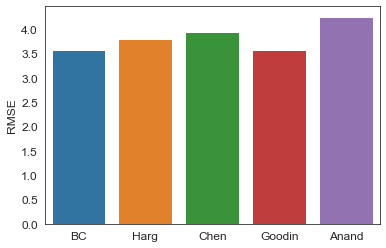

In [102]:
sns.set_context(font_scale=12,rc={"font.size":12,"axes.labelsize":12})
sns.set_style("white")
plot= sns.barplot(x=tabela_erros.index,y='RMSE',data=tabela_erros)
plt.xlabel("Modelos",font)
plt.ylabel("RMSE")
plt.title('Comparação entre os "RMSE" dos modelos') 
plt.show(plot)

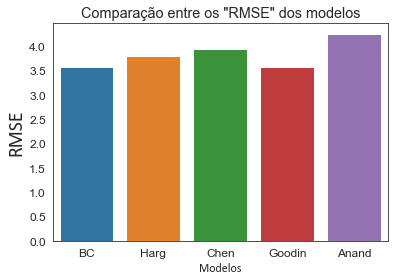

In [103]:
sns.set_context(font_scale=12,rc={"font.size":12,"axes.labelsize":20})
sns.set_style("white")
plot= sns.barplot(x=tabela_erros.index,y='RMSE',data=tabela_erros)
plt.xlabel("Modelos",fontname="Calibri", fontsize=12)    
plt.ylabel("RMSE",fontname="Calibri")
plt.title('Comparação entre os "RMSE" dos modelos') 
plt.show(plot)

In [31]:
tabela_erros

,r2,MAE,RMSE
BC,0.303681,2.724778,3.567810
Harg,0.225693,2.895352,3.791624
Chen,0.230540,3.278460,3.935448
Goodin,0.306064,2.718196,3.561917
Anand,0.083381,3.410041,4.252414


In [101]:
sns.set_palette('tab10')
plt.plot(np.arange(len(Max)),Max,color='#0139rr')

ValueError: Invalid RGBA argument: '#0139rr'

<Figure size 432x288 with 1 Axes>

In [50]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

### A baixo teste importante que vamos analisar

In [33]:
p=pd.DataFrame(dff)
p['KT']=p['KT'].round(2)
p.sort_values(by='KT',inplace=True)
p.index=p.KT
p

,H,Ho,dT,KT
KT,,,,
0.09,806.000000,8715.602317,1.9,0.09
0.09,1011.000000,10781.842867,3.3,0.09
0.09,1009.333333,10783.412350,2.4,0.09
0.11,1209.833333,10748.073033,1.8,0.11
0.11,974.500000,8813.326450,1.5,0.11
...,...,...,...,...
0.74,7584.833333,10275.581500,3.9,0.74
0.74,6681.500000,9064.869600,6.1,0.74
0.74,6861.000000,9323.071767,5.8,0.74


In [34]:
#0-0.2
display(p[0.05:0.2].shape)
display('---')
#0.2-0.3
display(p[0.2:0.26].shape)
display(p[0.26:0.3].shape)
display('---')
#0.3-0.4
display(p[0.3:0.32].shape)
display(p[0.32:0.34].shape)
display(p[0.34:0.36].shape)
display(p[0.36:0.38].shape)
display(p[0.38:0.4].shape)
display('---')
#0.4-0.5
display(p[0.4:0.41].shape)
display(p[0.41:0.42].shape)
display(p[0.42:0.43].shape)
display(p[0.43:0.44].shape)
display(p[0.44:0.45].shape)
display(p[0.45:0.46].shape)
display(p[0.46:0.47].shape)
display(p[0.47:0.48].shape)
display(p[0.48:0.49].shape)
display(p[0.49:0.5].shape)
############
display(p[0.5:0.6].shape)
display(p[0.6:0.7].shape)
display(p[0.7:0.8].shape)

(14, 4)

'---'

(16, 4)

(18, 4)

'---'

(17, 4)

(20, 4)

(17, 4)

(23, 4)

(26, 4)

'---'

(22, 4)

(24, 4)

(27, 4)

(30, 4)

(30, 4)

(34, 4)

(37, 4)

(38, 4)

(40, 4)

(43, 4)

(359, 4)

(1168, 4)

(337, 4)

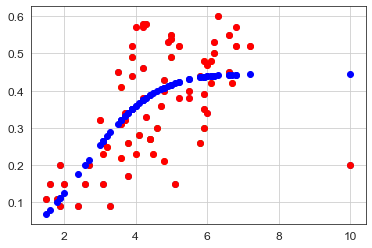

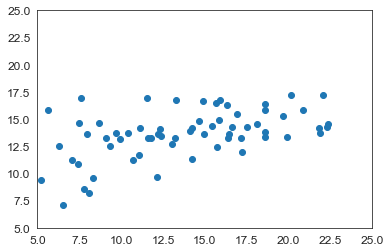

0.44
0.45


In [35]:
a0=p[0:0.2]

plt.scatter(p[0:0.2].dT,p[0:0.2].KT)

a=p[0.21:0.26].sample(7)
plt.scatter(a.dT,a.KT)
b=p[0.26:0.3].sample(7)
plt.scatter(b.dT,b.KT)

c=p[0.31:0.32].sample(3)
plt.scatter(c.dT,c.KT)
d=p[0.33:0.34].sample(3)
plt.scatter(d.dT,d.KT)
e=p[0.35:0.36].sample(3)
plt.scatter(e.dT,e.KT)
f=p[0.37:0.38].sample(3)
plt.scatter(f.dT,f.KT)
g=p[0.39:0.4].sample(3)
plt.scatter(g.dT,g.KT)

h=p[0.41:0.42].sample(3)
plt.scatter(h.dT,h.KT)
i=p[0.43:0.44].sample(3)
plt.scatter(i.dT,i.KT)
j=p[0.45:0.46].sample(3)
plt.scatter(j.dT,j.KT)
k=p[0.47:0.48].sample(3)
plt.scatter(k.dT,k.KT)
l=p[0.49:0.5].sample(3)
plt.scatter(l.dT,l.KT)

m=p[0.51:0.52].sample(3)
plt.scatter(m.dT,m.KT)
n=p[0.52:0.53].sample(3)
plt.scatter(n.dT,n.KT)
o=p[0.54:0.55].sample(3)
plt.scatter(o.dT,o.KT)
q=p[0.56:0.57].sample(3)
plt.scatter(q.dT,q.KT)
r=p[0.58:0.6].sample(3)
plt.scatter(r.dT,r.KT)

#s=p[0.61:0.62].sample(3)
#plt.scatter(s.dT,s.KT)
#t=p[0.62:0.63].sample(3)
#plt.scatter(t.dT,t.KT)
#u=p[0.64:0.65].sample(3)
#plt.scatter(u.dT,u.KT)
#v=p[0.66:0.67].sample(3)
#plt.scatter(v.dT,v.KT)
#w=p[0.68:0.7].sample(3)
#plt.scatter(w.dT,w.KT)

#a1=p[0.71:0.72].sample(3)
#plt.scatter(a1.dT,a1.KT)
#b1=p[0.72:0.73].sample(3)
#plt.scatter(b1.dT,b1.KT)
#c1=p[0.74:0.75].sample(3)
#plt.scatter(c1.dT,c1.KT)

#z=pd.concat([a0,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,q,r,s,t,u,v,w,a1,b1,c1])
z=pd.concat([a0,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,q,r])
#z=pd.concat([a0,a,b,c,d,e,f,g,h,i,j,k,l])
z.index=np.arange(len(z.dT))
#z.dT=z.dT.replace(10,2)
g1=[0.4,1,3]

n1= len(z.dT)
y1= np.empty(n1)

from scipy.optimize import curve_fit

c2,cov = curve_fit(KTBC,z.dT,z.KT,g1)

for i1 in range (n1):
    y1[i1]=KTBC(z.dT[i1],c2[0],c2[1],c2[2])

plt.scatter(z.dT,z.KT,color='r')
plt.scatter(z.dT,y1,color='b')
plt.grid()
plt.show()

#plt.plot(KTBC(np.arange(0,100,0.1),c2[0],c2[1],c2[2]))
#plt.show()

plt.scatter(z.H*3600/10**6,y1*z.Ho*3600/10**6)
plt.xlim(5,25)
plt.ylim(5,25)
plt.show()

print(r2_score(z.KT,y1).round(2))
print(r2_score(z.H,y1*z.Ho).round(2))

In [36]:
dff.sort_values(by='KT').set_index(['KT'])[0:0.3]

,H,Ho,dT
KT,,,
0.09,806.000000,8715.602317,1.9
0.09,1011.000000,10781.842867,3.3
0.09,1009.333333,10783.412350,2.4
0.11,1209.833333,10748.073033,1.8
0.11,974.500000,8813.326450,1.5
0.15,1313.833333,8605.842467,2.6
0.15,1321.166667,9022.005133,1.6
0.15,1558.666667,10454.054850,5.1
0.15,1441.500000,9824.844867,3.1


In [37]:
pd.read_excel()

TypeError: read_excel() missing 1 required positional argument: 'io'

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx